In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [ ]:
# Define the sine function for Synthetic Data
def sin_function(t, amp0, freq0, phase0, vert0):
    return amp0 * np.sin(freq0 * t + phase0) + vert0

def fit_function(t, amp, phase, vert):
    return amp * np.sin(2*np.pi * t + phase) + vert

In [6]:
# Pandas Reading
NEID = pd.read_csv("updated_rvs.csv")
NEID
RV = NEID.iloc[:, 1]
print(RV)
BJD = NEID.iloc[:, 0] #BJD(days) Replaces t
period_B = 2.770860 #days
print(BJD)

0     54.432074
1    -21.713454
2    -45.167308
3     -5.299056
4    -39.979129
5    -10.046810
6    -47.531130
7    -54.320239
8    133.349369
9    -33.789008
Name: rv, dtype: float64
0    2.460195e+06
1    2.460237e+06
2    2.460240e+06
3    2.460328e+06
4    2.460329e+06
5    2.460342e+06
6    2.460412e+06
7    2.460448e+06
8    2.460455e+06
9    2.460473e+06
Name: bjd, dtype: float64


In [8]:
#Phase Folding
phase_B = (BJD % period_B) / period_B
freq_true = 2*np.pi/period_B

# Processing Error
dvrms = NEID.iloc[:, 2]
#dvrms = dvrms / 2
print(dvrms)


0     7.408624
1     9.791496
2     8.761311
3     6.358875
4    10.720334
5    10.144447
6     8.128676
7    10.142950
8     7.554475
9     6.227334
Name: e_rv, dtype: float64


In [24]:
# Perform the initial fit
params, params_covariance = curve_fit(fit_function, phase_B, RV,sigma=dvrms)
amp_fit, phase_fit, vert_fit = params

# Generate fitted data
freq_fit = freq_true
y_fit = sin_function(BJD, amp_fit, freq_fit, phase_fit, vert_fit)
print('Amplitude:', abs(amp_fit))
print('Phase:', phase_fit % (2*np.pi))
print('Vertical Shift:', vert_fit)


Amplitude: 94.11901124300546
Phase: 1.1460334412521718
Vertical Shift: 33.77388772992097


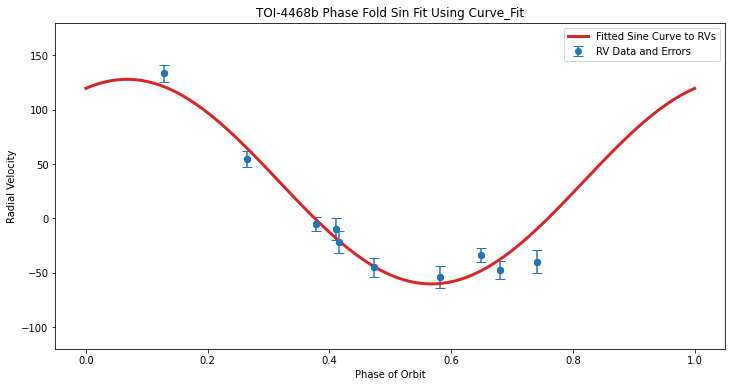

In [25]:
#Plotting
plt.figure(figsize=(12, 6))
plt.ylim(-120, 180)
plt.plot(phase_B, RV, 'o',color='blue')
plt.errorbar(phase_B, RV, yerr=abs(dvrms), label='RV Data and Errors', fmt='o', capsize=5)

t_fit = np.linspace(0, 1, 100)
y_line = fit_function(t_fit, amp_fit, phase_fit, vert_fit)
plt.plot(t_fit, y_line, label='Fitted Sine Curve to RVs', color='tab:red', linewidth=3)
plt.xlabel('Phase of Orbit')
plt.ylabel('Radial Velocity')
plt.title('TOI-4468b Phase Fold Sin Fit Using Curve_Fit')
plt.legend()
plt.show()

In [12]:
#Mass Computation
import numpy as np

# Given parameters
K = abs(amp_fit)  # Radial velocity amplitude in m/s
P = 239402.304  # Orbital period in seconds
M_s = 1.63489e30  # Mass of the host star in kg
e = 0  # Eccentricity

# Gravitational constant in m^3 kg^-1 s^-2
G = 6.67430e-11  

# Calculate M_p * sin(i)
Mp_sin_i = K * ((P / (2 * np.pi * G)) ** (1/3)) * (M_s ** (2/3)) * (np.sqrt(1 - e**2))

# Output the result
Mp_sin_i

Mp_sin_i = Mp_sin_i / 1.898e27
print(Mp_sin_i)

0.5708926050920563
